In [14]:
import torch 

import numpy as np 
from torchvision import datasets, transforms

In [15]:
batch_size = 32

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last = True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, drop_last = True)

In [16]:
for images, labels in trainloader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


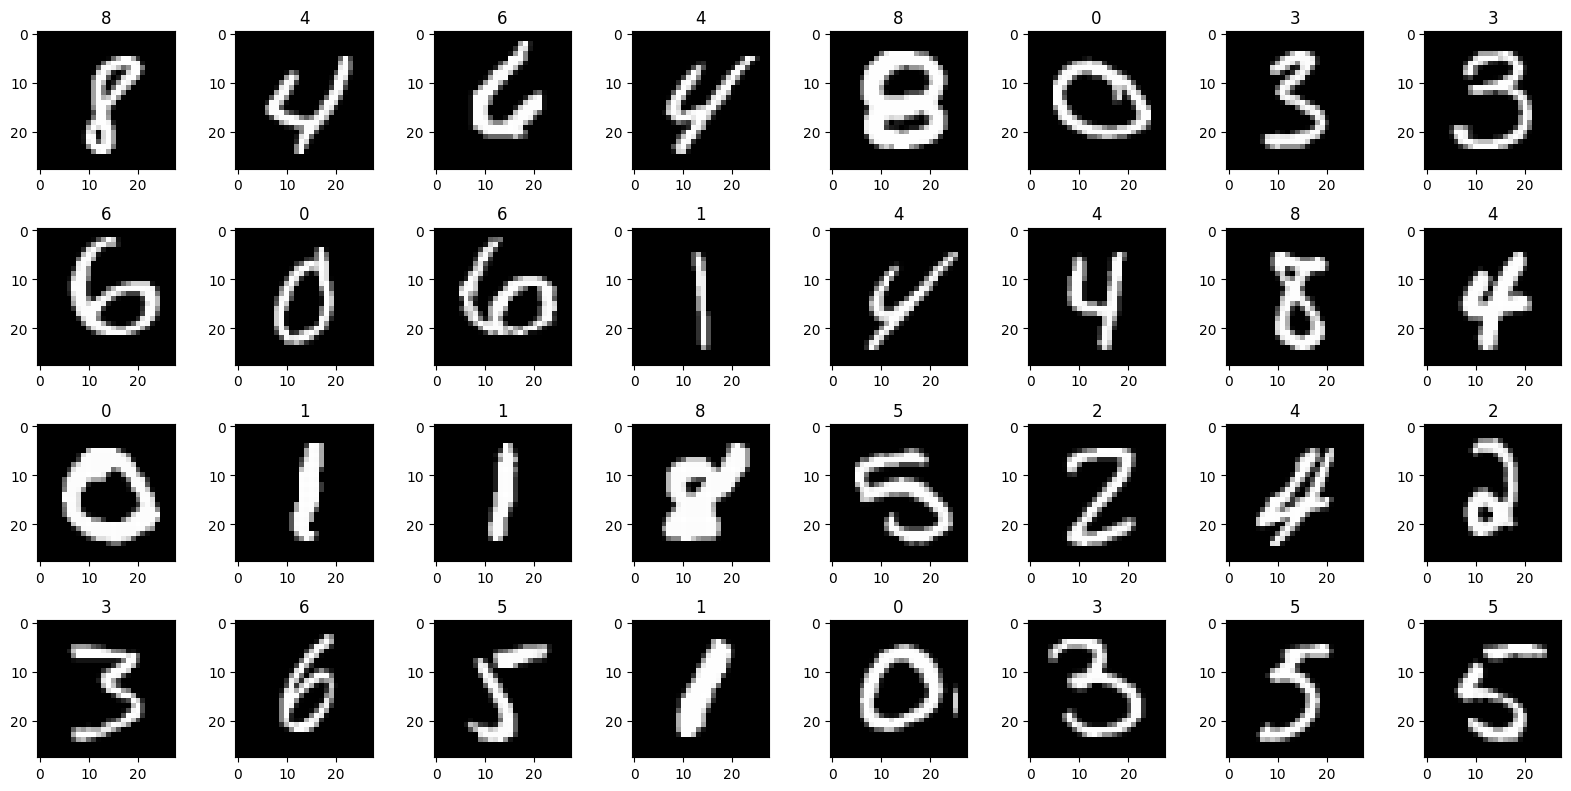

In [17]:
import matplotlib.pyplot as plt 
images, labels = next(iter(testloader))
fig, axis = plt.subplots(4, 8, figsize= (16, 8))
for idx, ax in enumerate(axis.flat):
    ax.imshow(images[idx, :, :, :].view((28, 28, 1)), cmap = 'gray')
    ax.set_title(labels[idx].item())
plt.tight_layout();
    

In [18]:
from torch import nn, optim
import torch.nn.functional as F

class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1) # (1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [19]:
model = FCNN()
criterion = nn.NLLLoss()#Negative log likelyhood loss
optimizer  = optim.Adam(model.parameters(), lr=0.003)

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
criterion = criterion.to(device)

In [21]:
print(len(trainset))
print(len(trainloader))
print(len(trainloader) * batch_size)

60000
1875
60000


In [22]:
from tqdm import tqdm
epochs = 5 # how many times my entire data is passed to model
train_loss_epoch = []
test_loss_epoch = []
for e in tqdm(range(epochs)):
    print('#' * 32)
    print(f'starting training for epoch : {e}')
    running_train_loss = 0
    running_test_loss = 0
    for images, labels in trainloader:
        # print(images.shape)
        # print(labels.shape)
        optimizer.zero_grad() # zero down all the gradients before the next pass
        images = images.to(device) # Image and  label need to in the same device as the model
        labels = labels.to(device)
        logits = model(images) # passing the data to the model, logits are my predicted values
        loss = criterion(logits, labels) # calculate the loss
        loss.backward() # Backpropagation
        optimizer.step() # Applying gradient descent
        running_train_loss += loss.item()
    else:
        print(f'Trainning loss: {running_train_loss/len(trainloader)}')
    accuracy_cnt = 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.to(device)
            labels = labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)
            logits_idx = torch.max(logits, axis= 1).indices
            score = (logits_idx == labels).sum().item()
            accuracy_cnt += score
            running_test_loss += loss.item()
    print(f'test_accuracy: ', accuracy_cnt/(len(testloader) * batch_size))
    train_loss_epoch.append(running_train_loss/len(trainloader))
    test_loss_epoch.append(running_test_loss/len(testloader))

  0%|          | 0/5 [00:00<?, ?it/s]

################################
starting training for epoch : 0
Trainning loss: 0.3389141090194384


 20%|██        | 1/5 [00:25<01:41, 25.28s/it]

test_accuracy:  0.9375
################################
starting training for epoch : 1
Trainning loss: 0.1869312064257761


 40%|████      | 2/5 [00:48<01:13, 24.35s/it]

test_accuracy:  0.9348958333333334
################################
starting training for epoch : 2
Trainning loss: 0.16026307794824243


 60%|██████    | 3/5 [01:12<00:48, 24.14s/it]

test_accuracy:  0.9574318910256411
################################
starting training for epoch : 3
Trainning loss: 0.14240905583708857


 80%|████████  | 4/5 [01:39<00:25, 25.17s/it]

test_accuracy:  0.9321915064102564
################################
starting training for epoch : 4
Trainning loss: 0.13262696472990015


100%|██████████| 5/5 [02:03<00:00, 24.69s/it]

test_accuracy:  0.9670472756410257
